##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [3]:
#%pip install pandas
#%pip install pyarrow
#%pip install numpy
#%pip install scikit-learn
#%pip install imbalanced-learn
#%pip install matplotlib

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .parquet file inside that. A relative path *must* be used when loading data into pandas

In [4]:
import pandas as pd
# Can have as many cells as you want for code
import pandas as pd
file_path = "./data/catB_train.parquet" 

df = pd.read_parquet(file_path)

df.head()

,clntnum,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_substandard,flg_is_borderline_standard,...,recency_giclaim,giclaim_cnt_success,recency_giclaim_success,giclaim_cnt_unsuccess,recency_giclaim_unsuccess,flg_gi_claim_29d435_ever,flg_gi_claim_058815_ever,flg_gi_claim_42e115_ever,flg_gi_claim_856320_ever,f_purchase_lh
19550,91b546e924,Chinese,Singapore,P,ACTIVE,2017-10-31,1974-05-09,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
4600,896bae548c,Chinese,Singapore,P,ACTIVE,2007-05-23,1979-11-11,Male,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
13337,f364439ae6,Others,Singapore,P,ACTIVE,2019-08-31,1976-01-28,Male,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
15074,70f319cfe1,Chinese,Singapore,P,ACTIVE,2021-10-18,1976-03-19,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
19724,2647a81328,Chinese,Singapore,P,ACTIVE,2018-07-20,1995-07-31,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN


### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

In [5]:
df.shape #to get the size of the dataframe

(17992, 304)

In [6]:
df.info() #to understand the datatypes of dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 17992 entries, 19550 to 15795
Columns: 304 entries, clntnum to f_purchase_lh
dtypes: float64(44), int64(46), object(214)
memory usage: 41.9+ MB


In [7]:
df.isna().sum() #find out the number of missing values for each column

clntnum                         0
race_desc                    3996
ctrycode_desc                  20
clttype                         0
stat_flag                       0
                            ...  
flg_gi_claim_29d435_ever    17992
flg_gi_claim_058815_ever    17992
flg_gi_claim_42e115_ever    17992
flg_gi_claim_856320_ever    17992
f_purchase_lh               17282
Length: 304, dtype: int64

In [8]:
df = df.drop_duplicates() #drop duplicate rows

To clean the dataframe, we will change all NAn values to 0 for f_purchase_lh and f_ever_declined_la, to indicate that clients will not purchase in the next 3 months. This is because we are basing it on the extreme and worse case scenario so that we will not overestimate our predictions for target column.

In [9]:
selected_column_indices = list(range(1, 35)) + [-1]

# Create a new DataFrame with selected columns using iloc
df_clean = df.iloc[:, selected_column_indices]
df_clean.loc[:, "f_purchase_lh"] = df_clean.loc[:, "f_purchase_lh"].fillna(0)
df_clean.loc[:, "f_ever_declined_la"] = df_clean.loc[:, "f_ever_declined_la"].fillna(0)
df_clean.drop(columns=["hh_20","pop_20"],inplace=True)
df_clean.head()

/var/folders/6h/v7qbzbxj5z9d59jlx48f1d540000gn/T/ipykernel_11460/3764654855.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=["hh_20","pop_20"],inplace=True)


,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,...,is_housewife_retiree,is_sg_pr,is_class_1_2,is_dependent_in_at_least_1_policy,f_ever_declined_la,hh_size,hh_size_est,annual_income_est,n_months_last_bought_products,f_purchase_lh
19550,Chinese,Singapore,P,ACTIVE,2017-10-31,1974-05-09,Female,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.402778,1,C.60K-100K,1,0.0
4600,Chinese,Singapore,P,ACTIVE,2007-05-23,1979-11-11,Male,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,3.137255,3,D.30K-60K,45,0.0
13337,Others,Singapore,P,ACTIVE,2019-08-31,1976-01-28,Male,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2.887097,3,A.ABOVE200K,47,0.0
15074,Chinese,Singapore,P,ACTIVE,2021-10-18,1976-03-19,Female,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,4.000000,4,B.100K-200K,22,0.0
19724,Chinese,Singapore,P,ACTIVE,2018-07-20,1995-07-31,Female,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,4.192982,>4,E.BELOW30K,62,0.0


In [10]:
list(df_clean.columns.values) #this code is just for us to check which columns are left)

['race_desc',
 'ctrycode_desc',
 'clttype',
 'stat_flag',
 'min_occ_date',
 'cltdob_fix',
 'cltsex_fix',
 'flg_substandard',
 'flg_is_borderline_standard',
 'flg_is_revised_term',
 'flg_is_rental_flat',
 'flg_has_health_claim',
 'flg_has_life_claim',
 'flg_gi_claim',
 'flg_is_proposal',
 'flg_with_preauthorisation',
 'flg_is_returned_mail',
 'is_consent_to_mail',
 'is_consent_to_email',
 'is_consent_to_call',
 'is_consent_to_sms',
 'is_valid_dm',
 'is_valid_email',
 'is_housewife_retiree',
 'is_sg_pr',
 'is_class_1_2',
 'is_dependent_in_at_least_1_policy',
 'f_ever_declined_la',
 'hh_size',
 'hh_size_est',
 'annual_income_est',
 'n_months_last_bought_products',
 'f_purchase_lh']

In [11]:
column_data_types = df_clean.dtypes
print(column_data_types) #checking each columns' datatype

race_desc                             object
ctrycode_desc                         object
clttype                               object
stat_flag                             object
min_occ_date                          object
cltdob_fix                            object
cltsex_fix                            object
flg_substandard                      float64
flg_is_borderline_standard           float64
flg_is_revised_term                  float64
flg_is_rental_flat                   float64
flg_has_health_claim                 float64
flg_has_life_claim                   float64
flg_gi_claim                         float64
flg_is_proposal                      float64
flg_with_preauthorisation            float64
flg_is_returned_mail                 float64
is_consent_to_mail                   float64
is_consent_to_email                  float64
is_consent_to_call                   float64
is_consent_to_sms                    float64
is_valid_dm                          float64
is_valid_e

In [12]:
import numpy as np
df_clean['client_risk'] = np.where(df_clean['flg_substandard'] == 1, 'Substandard',
                                np.where(df_clean['flg_is_borderline_standard'] == 1, 'Borderline Standard', 'Standard'))


# We combined flg_substandard, flg_is_borderline_standard into a new column client_risk, to label the types of each client

/var/folders/6h/v7qbzbxj5z9d59jlx48f1d540000gn/T/ipykernel_11460/2352932146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['client_risk'] = np.where(df_clean['flg_substandard'] == 1, 'Substandard',


In [13]:
df_clean.drop(columns=["flg_substandard","flg_is_borderline_standard"]) #remove the columns "flg_substandard" and "flg_is_borderline_standard"

,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_is_revised_term,flg_is_rental_flat,flg_has_health_claim,...,is_sg_pr,is_class_1_2,is_dependent_in_at_least_1_policy,f_ever_declined_la,hh_size,hh_size_est,annual_income_est,n_months_last_bought_products,f_purchase_lh,client_risk
19550,Chinese,Singapore,P,ACTIVE,2017-10-31,1974-05-09,Female,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.402778,1,C.60K-100K,1,0.0,Standard
4600,Chinese,Singapore,P,ACTIVE,2007-05-23,1979-11-11,Male,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,3.137255,3,D.30K-60K,45,0.0,Standard
13337,Others,Singapore,P,ACTIVE,2019-08-31,1976-01-28,Male,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,2.887097,3,A.ABOVE200K,47,0.0,Standard
15074,Chinese,Singapore,P,ACTIVE,2021-10-18,1976-03-19,Female,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,4.000000,4,B.100K-200K,22,0.0,Standard
19724,Chinese,Singapore,P,ACTIVE,2018-07-20,1995-07-31,Female,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,4.192982,>4,E.BELOW30K,62,0.0,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,None,Singapore,P,LAPSED,2016-08-01,1994-05-24,Male,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,3.211765,3,E.BELOW30K,36,0.0,Standard
11964,Chinese,Singapore,P,ACTIVE,1990-03-20,1948-12-16,Male,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.000000,0,B.100K-200K,407,0.0,Standard
5390,Chinese,Singapore,P,ACTIVE,2007-12-31,1967-12-06,Female,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,3.372093,3,D.30K-60K,101,0.0,Standard
860,Others,Singapore,P,ACTIVE,2007-09-01,1986-04-01,Male,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,4.486111,>4,E.BELOW30K,46,0.0,Standard


/var/folders/6h/v7qbzbxj5z9d59jlx48f1d540000gn/T/ipykernel_11460/2966068819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=client_risk_counts.index, y=client_risk_counts.values, palette='viridis')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


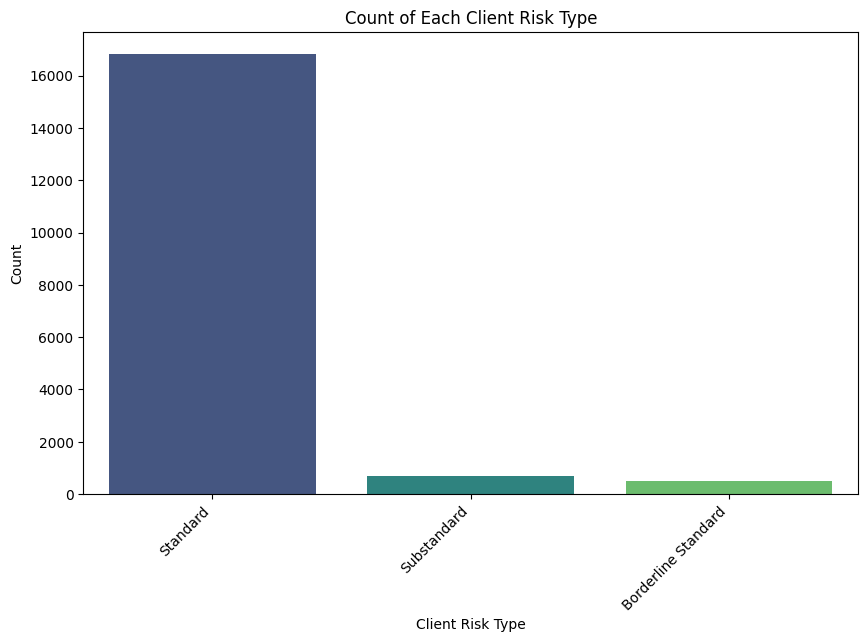

In [14]:
#code to help us understand size of each client type
import matplotlib.pyplot as plt
import seaborn as sns

client_risk_counts = df_clean['client_risk'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=client_risk_counts.index, y=client_risk_counts.values, palette='viridis')
plt.title('Count of Each Client Risk Type')
plt.xlabel('Client Risk Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.show()

From here we understand that standard client risk types make up the largest group of customer base.

The code below is to create 3 piecharts to visualise the percentage of each 
type of clients who will purchase insurance plan in the next 3 months. This will let us know the behaviours of each client type and how our current outreach and interactions with them are going.

/var/folders/6h/v7qbzbxj5z9d59jlx48f1d540000gn/T/ipykernel_11460/1075828752.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_risk_type['f_purchase_lh'].fillna(0, inplace=True)
/var/folders/6h/v7qbzbxj5z9d59jlx48f1d540000gn/T/ipykernel_11460/1075828752.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_risk_type['f_purchase_lh'].fil

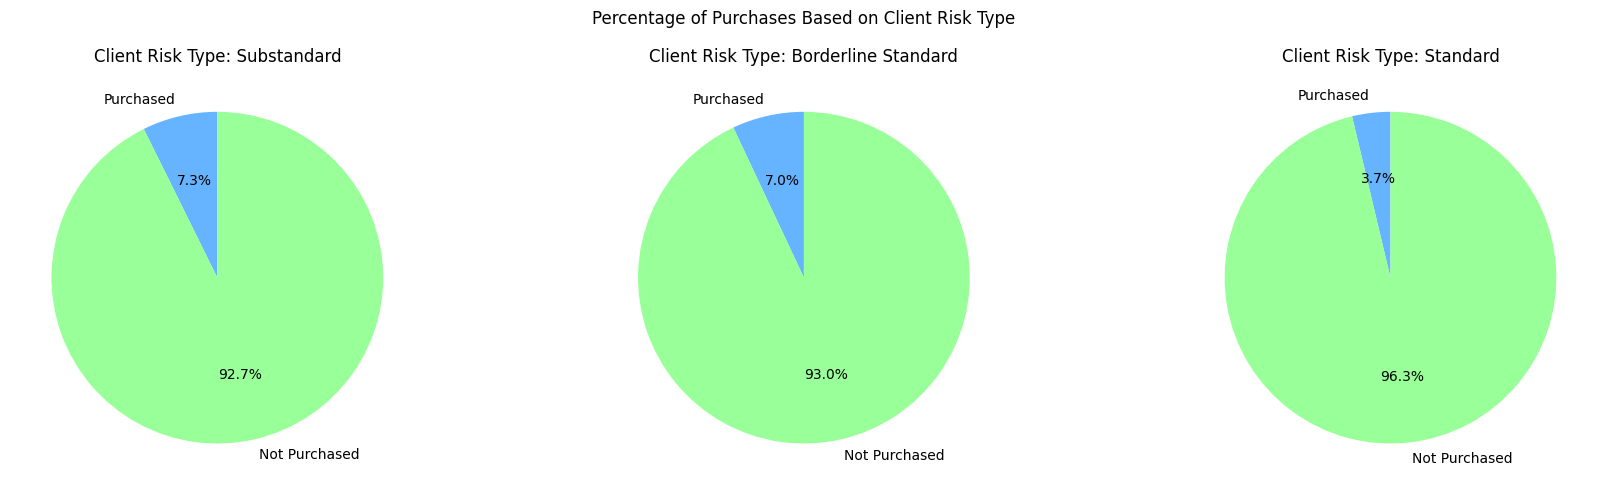

In [15]:
client_risk_types = ['Substandard', 'Borderline Standard', 'Standard']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Iterate over client risk types
for i, risk_type in enumerate(client_risk_types):
    # Filter the DataFrame to include only rows with the current client risk type
    df_risk_type = df_clean[df_clean['client_risk'] == risk_type]

    # Replace NaN values with 0 in the 'f_purchase_lh' column
    df_risk_type['f_purchase_lh'].fillna(0, inplace=True)

    # Calculate the percentage of people who made a purchase within the subset
    percentage_purchase = (df_risk_type['f_purchase_lh'].sum() / len(df_risk_type)) * 100

    # Create a pie chart for the current client risk type
    labels = ['Purchased', 'Not Purchased']
    sizes = [percentage_purchase, 100 - percentage_purchase]
    colors = ['#66b3ff', '#99ff99']  # Blue for Purchased, Green for Not Purchased

    axes[i].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Client Risk Type: {risk_type}')

# Set overall title
fig.suptitle('Percentage of Purchases Based on Client Risk Type')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


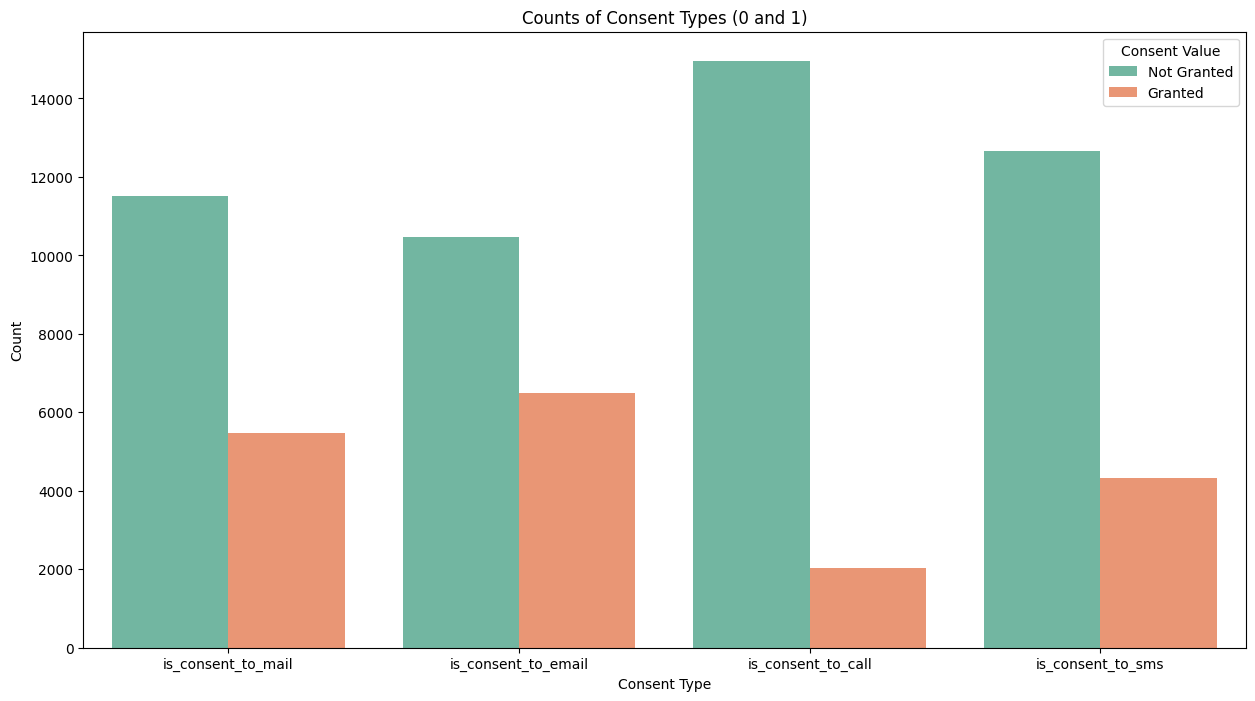

In [16]:
columns_of_interest = ['is_consent_to_mail', 'is_consent_to_email', 'is_consent_to_call',
                         'is_consent_to_sms']

# Melt the DataFrame to create a long-form representation
df_melted = pd.melt(df[columns_of_interest], var_name='Consent Type', value_name='Consent Value')

# Plot a side-by-side countplot
plt.figure(figsize=(15, 8))
sns.countplot(x='Consent Type', hue='Consent Value', data=df_melted, palette='Set2')

# Set plot labels and title
plt.xlabel('Consent Type')
plt.ylabel('Count')
plt.title('Counts of Consent Types (0 and 1)')

# Show the legend
plt.legend(title='Consent Value', loc='upper right', labels=['Not Granted', 'Granted'])

# Show the plot
plt.show()

This barchart shows an overview of the various types of communication that clients prefer. In this case, email is the most preferred form of communication. By extension, Singlife could choose to focus their marketing strategies and communication on insurance products to clients via email. On the other hand, the highest not granted form of communication is through call. Perhaps, Singlife can choose to remove call as a form as communication, since it may not be effective in reaching out to clients. This could also allow Singlife to achieve cost savings by reducing manpower in that aspect.

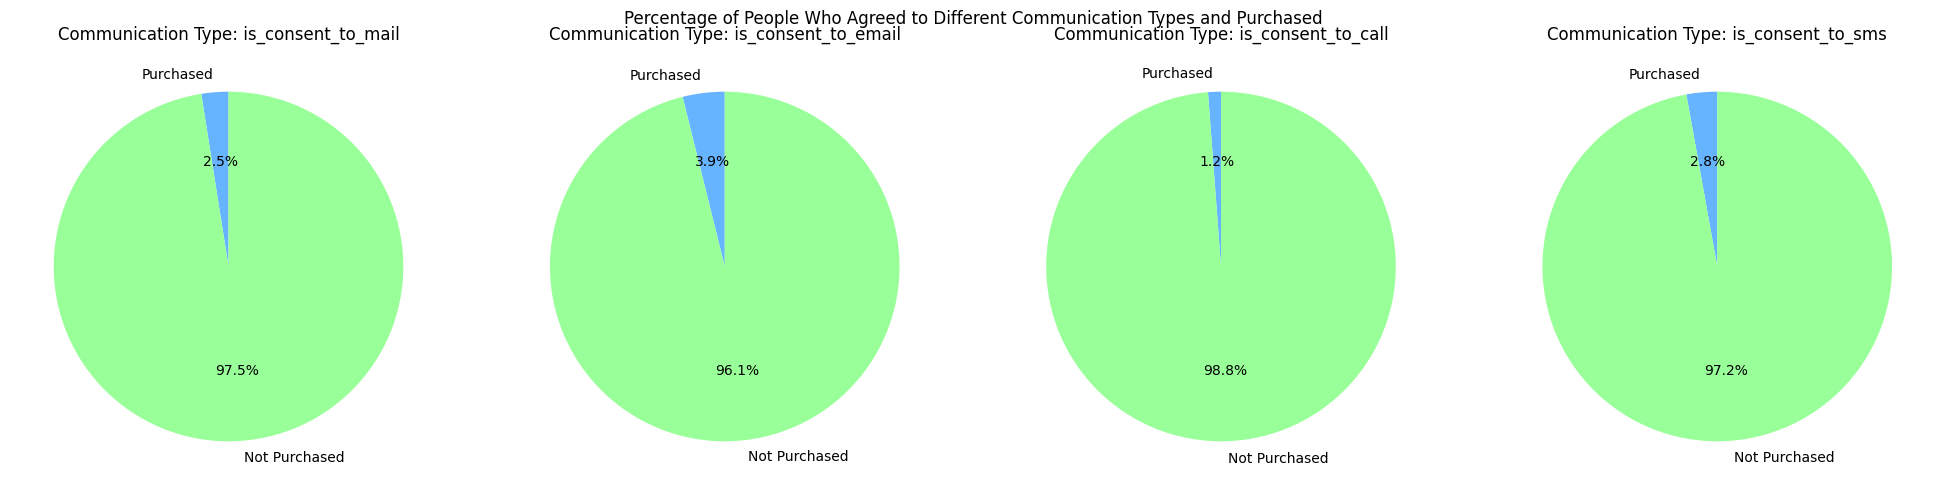

In [17]:
communication_types = ['is_consent_to_mail', 'is_consent_to_email', 'is_consent_to_call', 'is_consent_to_sms']

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Iterate over communication types
for i, comm_type in enumerate(communication_types):
    # Filter the DataFrame to include only rows where the current communication type is 1
    df_comm_type = df_clean[df_clean[comm_type] == 1]

    # Calculate the percentage of people who made a purchase within the subset
    percentage_purchase = (df_comm_type['f_purchase_lh'].sum() / len(df_comm_type)) * 100

    # Create a pie chart for the current communication type
    labels = ['Purchased', 'Not Purchased']
    sizes = [percentage_purchase, 100 - percentage_purchase]
    colors = ['#66b3ff', '#99ff99']  # Blue for Purchased, Green for Not Purchased

    axes[i].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Communication Type: {comm_type}')

# Set overall title
fig.suptitle('Percentage of People Who Agreed to Different Communication Types and Purchased')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

The piecharts show the proportion of clients who will purchase health insurance products within 3 months for each mode of communication. Clients who gave consent to communication via email have the highest percentage of choosing to purchase the health insurance products. As seen, communication via email may be the most effective way to influence clients to purchase health insurance products. On the otherhand, communication via call witnessed the lowest percentage. Just like the previous graph, communication via call may not be the most optimal mode of communication for Singlife and clients.

In [18]:
# make a copy of df_clean to remove all rows that contain at least one NAn value. 
# This is because our values are either 0 or 1 (binary) so finding the mean/median for each value is not appropriate.
df_tree = df_clean.copy()
df_tree = df_tree.dropna()

The codes below is to make a decision tree to find out which of the 3 client 
risk type (standard, substandard and borderline standard) will be a key indicator of whether a client purchases within the next 3 months.

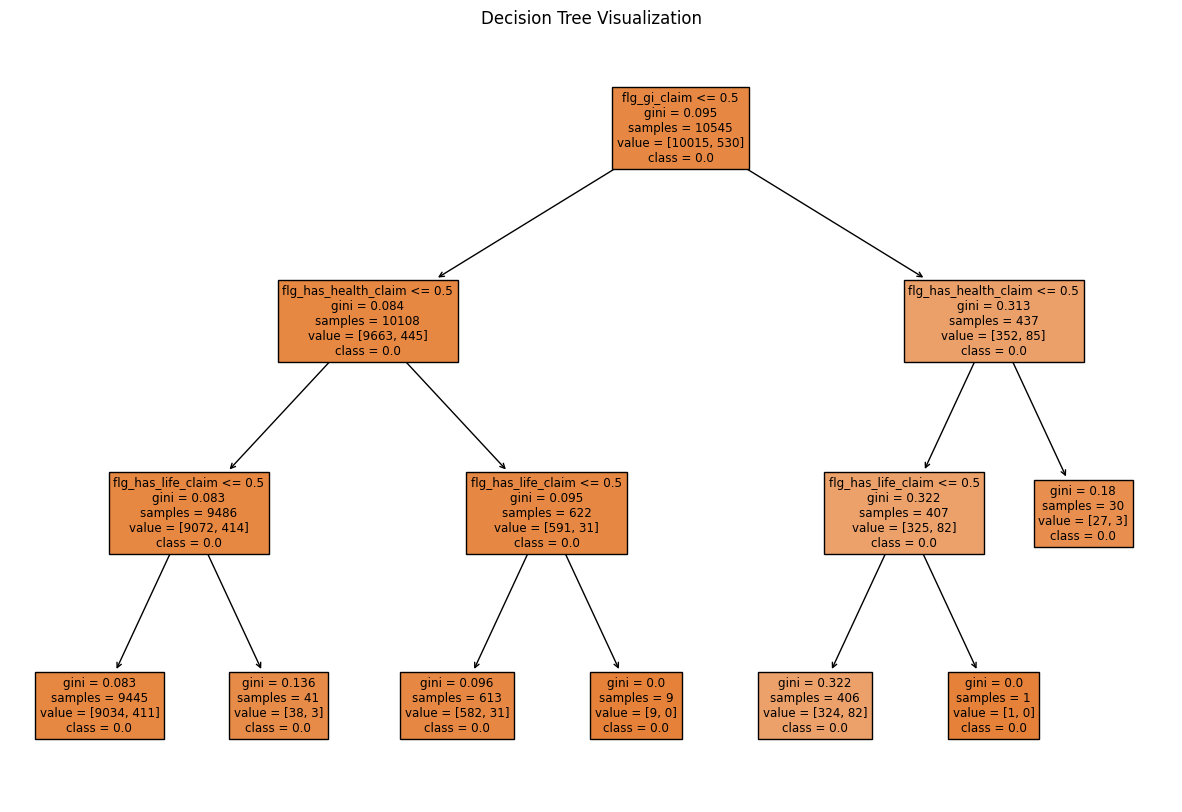

Decision Tree Rules:
 |--- flg_gi_claim <= 0.50
|   |--- flg_has_health_claim <= 0.50
|   |   |--- flg_has_life_claim <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- flg_has_life_claim >  0.50
|   |   |   |--- class: 0.0
|   |--- flg_has_health_claim >  0.50
|   |   |--- flg_has_life_claim <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- flg_has_life_claim >  0.50
|   |   |   |--- class: 0.0
|--- flg_gi_claim >  0.50
|   |--- flg_has_health_claim <= 0.50
|   |   |--- flg_has_life_claim <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- flg_has_life_claim >  0.50
|   |   |   |--- class: 0.0
|   |--- flg_has_health_claim >  0.50
|   |   |--- class: 0.0

Accuracy on the test set: 95.34%


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

features = ['flg_has_health_claim', 'flg_has_life_claim', 'flg_gi_claim']
target = 'f_purchase_lh'
data = df_tree[features + [target]]

# Split the data into features (X) and target variable (y) to get training and test data
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
decision_tree_classifier.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree_classifier, filled=True, feature_names=features, class_names=[str(x) for x in decision_tree_classifier.classes_])
plt.title("Decision Tree Visualization")
plt.show()

# Display the decision tree rules
tree_rules = export_text(decision_tree_classifier, feature_names=features)
print("Decision Tree Rules:\n", tree_rules)

# Evaluate the model on the test set (you might want to use more comprehensive evaluation metrics)
accuracy = decision_tree_classifier.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy:.2%}")

From the decision tree above, some key points that may result are:
Client having general claims have the largest role in predicting client NOT purchasing the policy, followed by health claims.

In [20]:
import pandas as pd

# Get the data types of all columns in df_clean
dtypes = df_clean.dtypes

# Select only numeric columns
numeric_columns = dtypes[dtypes != "object"].index.tolist()

# Create a new DataFrame with only numeric columns
df_stepwise = df_clean[numeric_columns]
df_stepwise = df_stepwise.dropna()

# Print the shape of the new DataFrame
print("Shape of df_stepwise:", df_stepwise.shape)

Shape of df_stepwise: (14690, 24)


Create new dataframe called df_stepwise for stepwise model selection to :choose a subset of predictor variables that optimally contribute to the predictive performance of the model. These new found predictors will be used to make a logistic regression model.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

df_stepwise = df_stepwise.dropna()
# Define the dependent and independent variables
y = df_stepwise["f_purchase_lh"]
X = df_stepwise.drop("f_purchase_lh", axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LogisticRegression model
model = LogisticRegression()

# Create the RFE object with the desired number of features
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

# Get the mask of selected features
selected_features_mask = rfe.support_

# Get the names of selected features
selected_features = X_train.columns[selected_features_mask]

# Print the names of selected features
print("Selected features:", selected_features)

# Create a new X_train with only selected features
X_train_selected = X_train[selected_features]

# Train a LogisticRegression model with selected features
model.fit(X_train_selected, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test[selected_features])
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Selected features: Index(['flg_gi_claim', 'flg_is_proposal', 'is_valid_dm', 'is_valid_email',
       'is_housewife_retiree'],
      dtype='object')
Accuracy: 0.9567733151803949


From the above results, our selected features are: flg_gi_claim, flg_is_proposal, is_valid_dm, is_valid_email,  is_housewife_retiree.
We then make a logistic regression model.

In [22]:
import pandas as pd
import statsmodels.api as sm

# Define the dependent and independent variables
y = df_stepwise["f_purchase_lh"]
X = df_stepwise[['flg_gi_claim', 'flg_is_proposal', 'is_valid_dm', 'is_valid_email',
       'is_housewife_retiree']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Create the logistic regression model
model = sm.Logit(y, X)

# Fit the model
results = model.fit()

# Print the results
print(results.summary())

ModuleNotFoundError: No module named 'statsmodels'

This logistic regression model suggests that variables such as flg_gi_claim, flg_is_proposal, is_valid_dm, is_valid_email, and is_housewife_retiree are statistically significant predictors of the likelihood of the event f_purchase_lh, and thus critical touchpoints for SingLife.

The value of the log-likelihood function = 0.173166. In logistic regression, the likelihood function represents the probability of observing the given data under the estimated model. Lower values indicate a better fit.

Analysis:

From the above, we know critical touchpoint clients are those who are housewives or retired.

SingLife should also pay more attention to ensuring clients get their general insurance claims, as well as pushing to curate insurance proposal for clients. The best mode of communication for doing these would likely be email, as mentioned above.

In [ ]:
# Make predictions on the data
y_pred = results.predict(X)

# Convert the predictions to binary values
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred]

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred_binary)

# Print the results
print("Accuracy:", accuracy)

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [ ]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    # Assuming df_tree is your DataFrame
    features = ['flg_has_health_claim', 'flg_has_life_claim', 'flg_gi_claim']
    target = 'f_purchase_lh'

    # Extract relevant features and target for the Decision Tree
    data = df_tree[features + [target]]

    # Split the data into features (X) and target variable (y)
    X = data[features]
    y = data[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Decision Tree classifier
    decision_tree_classifier = DecisionTreeClassifier(random_state=42)
    decision_tree_classifier.fit(X_train, y_train)

    # Visualize the decision tree
    plt.figure(figsize=(15, 10))
    plot_tree(decision_tree_classifier, filled=True, feature_names=features, class_names=[str(x) for x in decision_tree_classifier.classes_])
    plt.title("Decision Tree Visualization")
    plt.show()

    # Display the decision tree rules
    tree_rules = export_text(decision_tree_classifier, feature_names=features)
    print("Decision Tree Rules:\n", tree_rules)

    # Predict missing values in the hidden data
    hidden_data_x = hidden_data[features]
    hidden_data_y_predicted = decision_tree_classifier.predict(hidden_data_x)

    return hidden_data_y_predicted.tolist()

# This cell should output a list of predicted binary classes.

hidden_data = pd.read_parquet(filepath)  # Load your hidden data
print(testing_hidden_data(hidden_data))

##### Cell to check testing_hidden_data function

In [ ]:
# This cell should output a list of predictions.
test_df = pd.read_parquet(filepath)
test_df = test_df.drop(columns=["f_purchase_lh"])
print(testing_hidden_data(test_df))

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!